Nama: Arif Muhammad Laduni

NIM: 1103213003

Tugas: Week 11

Model: LeNet

Link ChatGPT:[Link](https://chatgpt.com/c/ff92e4fa-f8ae-4a94-9e36-cadad4036344)

LeNet adalah salah satu arsitektur jaringan saraf tiruan (neural network) yang dikembangkan oleh Yann LeCun, Leon Bottou, Yoshua Bengio, dan Patrick Haffner pada tahun 1998. Arsitektur ini merupakan salah satu yang pertama kali digunakan secara luas dalam pengenalan pola dan klasifikasi gambar. Arsitektur ini terdiri dari dua lapisan konvolusi yang diikuti oleh lapisan pooling, kemudian diikuti oleh dua lapisan fully connected (sepenuhnya terhubung).

# Import Library

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Transformasi data
transform = transforms.Compose([
    transforms.ToTensor(),  # Mengubah gambar menjadi Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalisasi gambar
])

# Mendownload dataset MNIST dan memuat dataloader untuk pelatihan dan pengujian
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Permodelan LeNet

In [22]:
# Definisikan model LeNet
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Membuat instance model LeNet
model = LeNet()

# Latih Model

In [23]:
# Tentukan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Latih model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.302
[1,   200] loss: 2.292
[1,   300] loss: 2.279
[1,   400] loss: 2.260
[1,   500] loss: 2.217
[1,   600] loss: 2.086
[1,   700] loss: 1.585
[1,   800] loss: 0.893
[1,   900] loss: 0.647
[2,   100] loss: 0.464
[2,   200] loss: 0.374
[2,   300] loss: 0.343
[2,   400] loss: 0.338
[2,   500] loss: 0.283
[2,   600] loss: 0.265
[2,   700] loss: 0.249
[2,   800] loss: 0.232
[2,   900] loss: 0.208
[3,   100] loss: 0.208
[3,   200] loss: 0.190
[3,   300] loss: 0.190
[3,   400] loss: 0.159
[3,   500] loss: 0.182
[3,   600] loss: 0.177
[3,   700] loss: 0.162
[3,   800] loss: 0.146
[3,   900] loss: 0.155
[4,   100] loss: 0.134
[4,   200] loss: 0.146
[4,   300] loss: 0.134
[4,   400] loss: 0.143
[4,   500] loss: 0.132
[4,   600] loss: 0.129
[4,   700] loss: 0.119
[4,   800] loss: 0.120
[4,   900] loss: 0.118
[5,   100] loss: 0.114
[5,   200] loss: 0.124
[5,   300] loss: 0.099
[5,   400] loss: 0.105
[5,   500] loss: 0.109
[5,   600] loss: 0.111
[5,   700] loss: 0.101
[5,   800] 

# Evaluasi Model

In [24]:
correct = 0
total = 0
with torch.no_grad():  # Menonaktifkan perhitungan gradien saat evaluasi
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Mengambil indeks kelas dengan probabilitas tertinggi
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 97 %


# Visualisasi Model

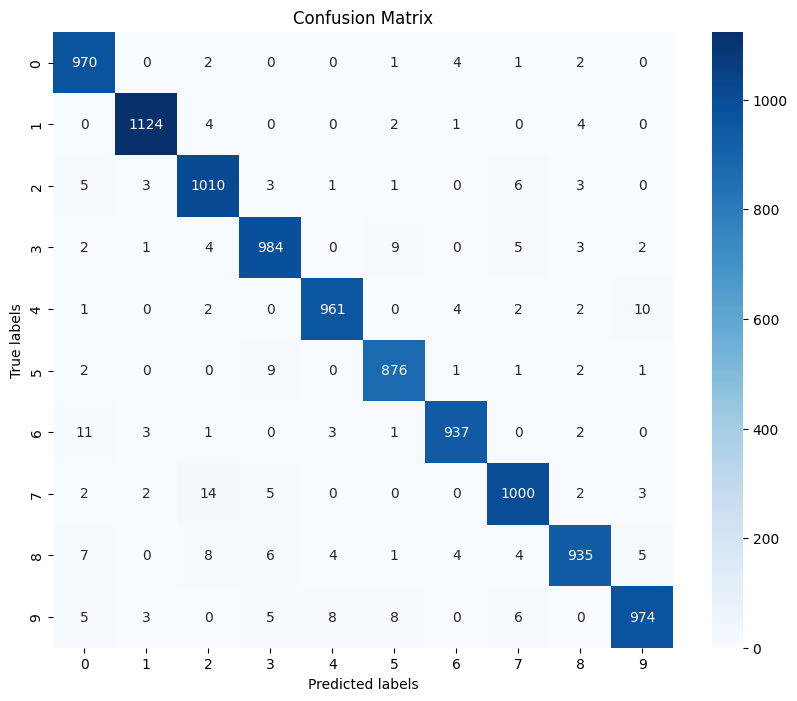

In [25]:
# Inisialisasi variabel untuk menyimpan prediksi dan label sebenarnya
all_predicted = []
all_labels = []

# Menerima prediksi dan label sebenarnya untuk semua data pengujian
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Membuat confusion matrix
cm = confusion_matrix(all_labels, all_predicted)

# Visualisasi confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()